<a href="https://colab.research.google.com/github/ravi-prakash1907/The-Spark-Foundation-Tasks/blob/main/Task2/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**

## Libraries

In [ ]:
from urllib.request import urlopen
import csv, re
import numpy as np
import pandas as pd
 
## for EDA
import seaborn as sns
import matplotlib.pyplot as plt  
 
# for model training and prediction
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
 
# for prediction
from random import randint

## Loading the DataSet

In [ ]:
def downloadCSV(urlLoc, saveAs):
  # loading bytestring
  try:
    with urlopen(urlLoc) as rsp:
      gotRaw = rsp.read()
    
    # saving as csv
    data = gotRaw.decode('utf-8').split('\r\n')
    
    with open(saveAs, "w") as datafile:
      writer = csv.writer(datafile, delimiter = ',')
      for line in data:        
        writer.writerow(re.split(',',line))
  except:
    print("Can not open the URL!!")

In [ ]:
## file locations
dataURL = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
localDataLoc = 'Dataset/data.csv'

## loading data
try:
  data = pd.read_csv(localDataLoc, header = 0)
  print("File was there!!")
except:
  downloadCSV(dataURL, localDataLoc)
  data = pd.read_csv(localDataLoc, header = 0)
  print("File was downloaded!!")

File was there!!


## Exploratory Data Analysis

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
print(data.isnull(),"\n\n")

print(data.isnull().sum())

    Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False 


Hours     0
Scores    0
dtype: int64


_**So, there is no null value in the given dataset**_

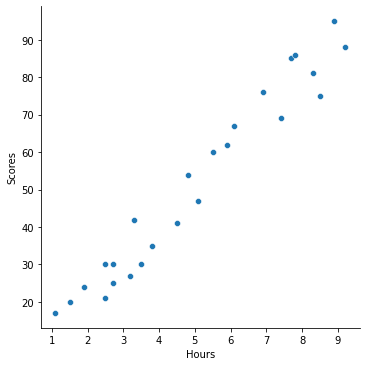

In [ ]:
## visualization
sns.relplot(x='Hours', y='Scores', data=data)

_**It has a linear relation**_

## Building the ML Model

### Data Preparation 

In [ ]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [ ]:
# test-train data split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

### Training on Linear Model

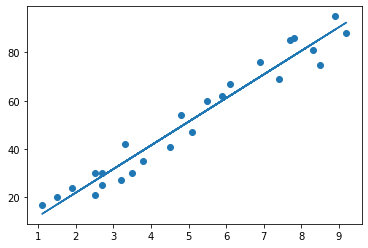

In [ ]:
## getting the model
linRegModel = LinearRegression()  

# training
linRegModel.fit(xtrain, ytrain) 


### plotting the regression line based on our training 
line = linRegModel.coef_*x+linRegModel.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Evaluation

In [ ]:
## testing the model
print("Testing Hours:\n\n",xtest)
 
# predicting the marks for test dataset
yPredicted = linRegModel.predict(xtest)
 
print("\n\nComparision:\n")
df = pd.DataFrame({'Reality': ytest, 'Prediction': yPredicted})  
 
df

Testing Hours:

 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


Comparision:



,Reality,Prediction
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


_**Let's check the mean absolute error**_

In [ ]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, yPredicted))

Mean Absolute Error: 4.419727808027651


In [ ]:
print("Model Score: ", linRegModel.score(xtest, ytest))

Model Score:  0.9568211104435257


## Prediction

In [ ]:
def predictMarks(hour = None):
  if hour is None:
    hour = round(randint(4,11))
  
  hour = np.array(hour)
  marks = linRegModel.predict(hour.reshape(-1, 1))

  print("Hours = {} \t|\t Marks = {}".format(hour, marks[0]))

In [ ]:
# a random prediction
predictMarks()

Hours = 10 	|	 Marks = 100.25648224983233


### **Prediction for the User Data**

In [ ]:
hours = float(input("Enter the hours (float): "))
 
print("\nPrediction: \n")
predictMarks(hours)

Enter the hours (float): 10.0

Prediction: 

Hours = 10.0 	|	 Marks = 100.25648224983233
